In [2]:
*| echo: true
*| code-fold: false
webuse lbw, clear
drop if age < 15 | age > 40 | lwt > 200
reg low smoke, robust

(Hosmer & Lemeshow data)
(10 observations deleted)



Linear regression                               Number of obs     =        179
                                                F(1, 177)         =       4.70
                                                Prob > F          =     0.0316
                                                R-squared         =     0.0272
                                                Root MSE          =     .46208



------------------------------------------------------------------------------


             |               Robust
         low | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------


       smoke |    .157405   .0726412     2.17   0.032     .0140507    .3007593
       _cons |   .2568807   .0420845     6.10   0.000     .1738289    .3399326


------------------------------------------------------------------------------


In [3]:
*| echo: true
*| code-fold: true
*| output: asis
qui {
gen any_premature = ptl >0
ren ftv no_of_visits_1tr
ren ht hist_hyper
ren lwt wgt_bef_preg
reg low smoke age i.race any_premature hist_hyper  no_of_visits_1tr wgt_bef_preg, robust nohead
}
est store lpm_results
esttab lpm_results,   se  wide nonumber ///
collabel(b se) md drop(1.race) nomtitle b(3) nonotes



|              |            b                  |           se |
| ------------ | :---------------------------: | :----------: |
| smoke        |        0.151<sup>\*</sup>     |      (0.075) |
| age          |       -0.005                  |      (0.007) |
| 2.race       |        0.210                  |      (0.112) |
| 3.race       |        0.126                  |      (0.079) |
| any\_premature |        0.275<sup>\*\*</sup>   |      (0.097) |
| hist\_hyper   |        0.396<sup>\*\*</sup>   |      (0.143) |
| no\_of\_visits\_1tr |       -0.005                  |      (0.034) |
| wgt\_bef\_preg |       -0.002                  |      (0.002) |
| \_cons       |        0.464                  |      (0.252) |
| *N*          |          179                  |              |




    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
     low_hat |        179    .3184358    .1878437  -.0346098   .9483117


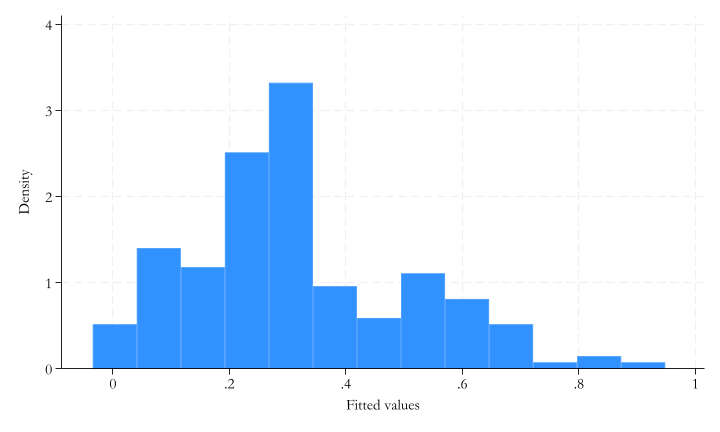

In [4]:
*| echo: true
*| code-fold: true
*| fig-align: center
qui: reg low smoke age i.race any_premature hist_hyper  no_of_visits_1tr wgt_bef_preg, robust nohead
qui: predict low_hat
qui:histogram low_hat
sum low_hat

In [5]:
*| echo: true
*| code-fold: true
sort low_hat
set linesize 255
 
qui: gen flag = 1 if _n<=5
qui: replace  flag = 2 if _n>=_N-4
list low_hat smoke age race any_premature hist_hyper  no_of_visits_1tr wgt_bef_preg   if flag==1
list low_hat smoke age race any_premature hist_hyper  no_of_visits_1tr wgt_bef_preg   if flag==2


     +---------------------------------------------------------------------------------+
     |   low_hat       smoke   age    race   any_pr~e   hist_h~r   no_of_~r   wgt_be~g |
     |---------------------------------------------------------------------------------|
  1. | -.0346098   Nonsmoker    32   White          0          0          2        186 |
  2. | -.0280454   Nonsmoker    36   White          0          0          0        175 |
  3. |  .0019138   Nonsmoker    32   White          0          0          0        170 |
  4. |  .0158307   Nonsmoker    23   White          0          0          0        190 |
  5. |  .0284496   Nonsmoker    28   White          0          0          0        167 |
     +---------------------------------------------------------------------------------+

     +--------------------------------------------------------------------------------+
     |  low_hat       smoke   age    race   any_pr~e   hist_h~r   no_of_~r   wgt_be~g |
     |---------------

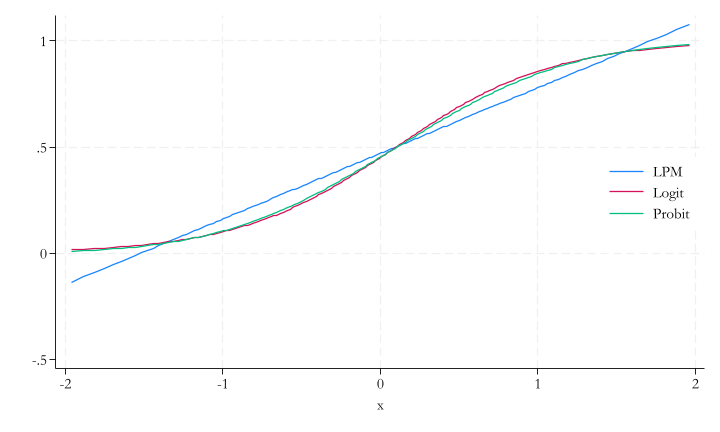

In [6]:
*| fig-align: center
*| echo: true
*| code-fold: true
qui {
clear
range p 0 1 202
drop if p==0 | p==1 
gen x = invnormal(p)
gen y = (x+rnormal())>0
reg  y x
predict y_1
logit y x
predict y_2
probit y x
predict y_3
drop if abs(x)>2
two (line y_1 x ) (line y_2 x) (line y_3 x), ///
legend(order(1 "LPM" 2 "Logit" 3 "Probit") pos(3) ring(0) col(1)) 
}

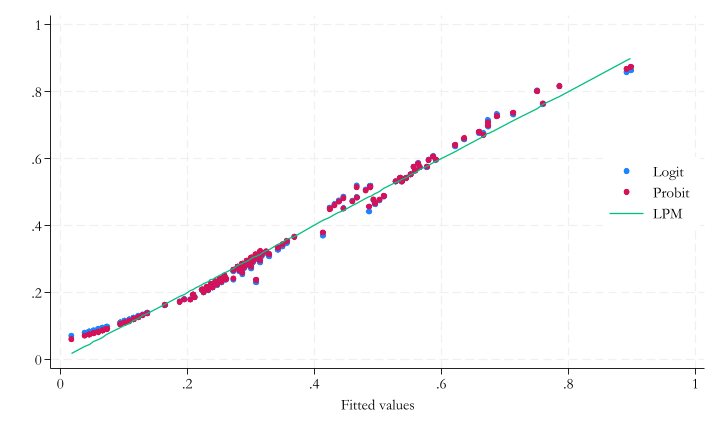

In [7]:
*| echo: true
*| code-fold: true
*| fig-align: center
 
qui {
  webuse lbw, clear
  drop if age < 15 | age > 40 | lwt > 200
  gen any_premature = ptl >0
  ren ftv no_of_visits_1tr
  ren ht hist_hyper
  ren lwt wgt_bef_preg
  gen black = 2.race
  gen other = 3.race
  reg low smoke age i.black i.other i.any_premature hist_hyper , robust nohead
  predict low_hat_ols
  est sto lpm_results
  logit low smoke age black other any_premature hist_hyper , robust nohead
  predict low_hat_logit
   probit low smoke age black other any_premature hist_hyper , robust nohead
  predict low_hat_probit
   two (scatter  low_hat_logit low_hat_probit low_hat_ols) ///
      (line low_hat_ols low_hat_ols, sort), ///
      legend(order(1 "Logit" 2 "Probit" 3 "LPM") pos(3) ring(0) col(1))
}

In [8]:
*| echo: true
*| code-fold: true
*| output: asis
 
qui {
  logit low smoke age i.black i.other i.any_premature hist_hyper , robust nohead
  est sto logit_results
  margins, dydx(*) post
  est sto logit_mfx
  probit low smoke age i.black i.other i.any_premature hist_hyper , robust nohead  
  est sto probit_results
  margins, dydx(*) post
  est sto probit_mfx
}
esttab lpm_results logit_results  logit_mfx probit_results probit_mfx, se  nonumber drop(0.*) ///
mtitle(LPM Logit Logit_MFX Probit Probit_MFX) collabel(none) md ///
star(* 0.10 ** 0.05 *** 0.01) nonotes 


|              |          LPM    |        Logit    |    Logit\_MFX    |       Probit    |   Probit\_MFX    |
| ------------ | :-------------: | :-------------: | :-------------: | :-------------: | :-------------: |
| main         |                 |                 |                 |                 |                 |
| smoke        |        0.166**  |        0.925**  |        0.169**  |        0.549**  |        0.169**  |
|              |     (0.0739)    |      (0.397)    |     (0.0695)    |      (0.235)    |     (0.0697)    |
| age          |     -0.00703    |      -0.0447    |     -0.00818    |      -0.0271    |     -0.00835    |
|              |    (0.00669)    |     (0.0377)    |    (0.00688)    |     (0.0221)    |    (0.00679)    |
| 1.black      |        0.192*   |        1.012*   |        0.202*   |        0.607*   |        0.202*   |
|              |      (0.111)    |      (0.526)    |      (0.109)    |      (0.314)    |      (0.108)    |
| 1.other      |        0.150*   |

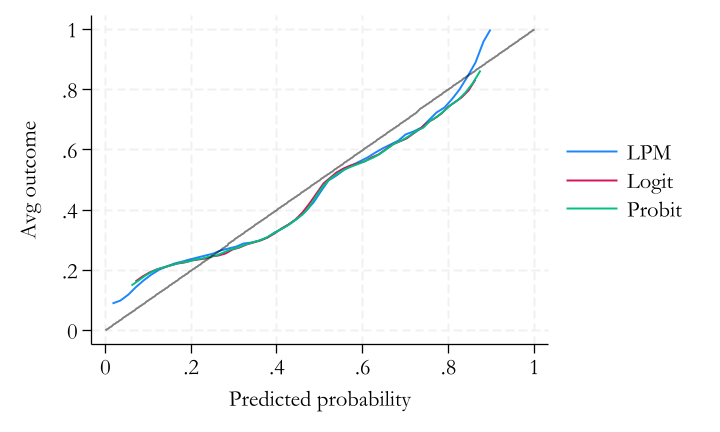

In [9]:
*| echo: true
*| code-fold: true
*| fig-align: center

two (lpoly low low_hat_ols) (lpoly low low_hat_logit) ///
(lpoly low low_hat_probit) (function y = x, range(0 1) lcolor(black%50)), ///
legend(order(1 "LPM" 2 "Logit" 3 "Probit") ) scale(1.5) ///
xtitle("Predicted probability") ytitle("Avg outcome")